## Name : Fawzi abdelnaby elsayed
## Group : One(Mansoura)
## Assignment_3_Day_2

## Apply MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

## Loading Dataset

In [2]:
#loading the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

## Normalizing the Images

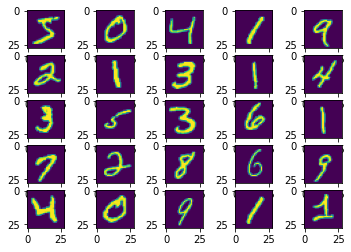

In [4]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

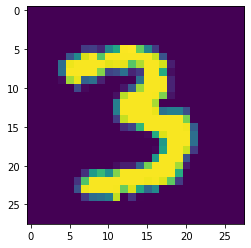

In [5]:
#plt.imshow(x_test[100])
#plt.imshow(x_test[200])
#plt.imshow(x_test[300])
plt.imshow(x_test[500])

In [6]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Building Simple NN with 2 hidden layer

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
# Two hidden layers
model.add(Dense(12, activation='relu',name='hidden1'))
model.add(Dense(8, activation='relu',name='hidden2'))
# output layer
model.add(Dense(1, activation='sigmoid',name='output'))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit Model                   
history=model.fit(x_train, y_train,epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: -125048.8906 - accuracy: 0.1125
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: -1397683.5000 - accuracy: 0.1124
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: -4907080.5000 - accuracy: 0.1124
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: -11265970.0000 - accuracy: 0.1124
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: -20969452.0000 - accuracy: 0.1124
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: -34477804.0000 - accuracy: 0.1124
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: -52317228.0000 - accuracy: 0.1124
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: -75065056.0000 - accuracy: 0.1124
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: -103218784.0000 - accuracy: 0.1124
Epoch 10/15
1

### Evaluate Model

In [11]:
_,accurecy_train=model.evaluate(x_train,y_train)
_,accurecy_test=model.evaluate(x_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

313/313 [==============================] - 1s 4ms/step - loss: -459653888.0000 - accuracy: 0.1135
accurecy_train:  11.236666887998581
accurecy_test:  11.349999904632568


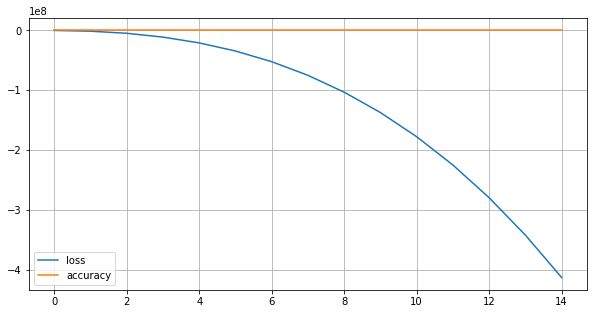

In [12]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

# Building a Convolutional Neural Network

In [13]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[28,28,1]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [14]:
cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [15]:
cifar10_model.layers

In [16]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Fit Model (Training)

In [17]:
history= cifar10_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 13ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0274 - sparse_categorical_accuracy: 0.9911


## Evaluate Model


In [18]:
_,accurecy_train=cifar10_model.evaluate(x_train,y_train)
_,accurecy_test=cifar10_model.evaluate(x_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

313/313 [==============================] - 2s 6ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9932
accurecy_train:  99.6500015258789
accurecy_test:  99.32000041007996


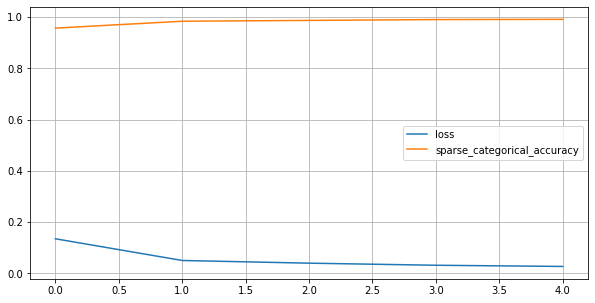

In [19]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()